In [1]:
from matplotlib import pyplot as plt
import numpy as np

from astropy.io import fits
from astropy.visualization import make_lupton_rgb

In [2]:
def luptonize(x, rgb_q=15, rgb_stretch=0.5, rgb_min=0):
    if x.ndim==3:
        x = make_lupton_rgb(x[:,:,2], x[:,:,1], x[:,:,0],
                      Q=rgb_q, stretch=rgb_stretch, minimum=rgb_min)
    elif x.ndim==4:
        x = np.array([make_lupton_rgb(xi[:,:,2], xi[:,:,1], xi[:,:,0],
                      Q=rgb_q, stretch=rgb_stretch, minimum=rgb_min)
                      for xi in x])
    else:
        raise ValueError(f"Wrong number of dimensions! Gave {x.ndim}, need 3 or 4")
    return x

In [9]:
# α=146.080065° δ=-0.653004° ∠=0.101864
# 146.080065, -0.653004
fits_dir = '../data/fits_files'
fits_fns = ['cutout-HSC-G-9325-pdr2_wide-201204-202720.fits',
            'cutout-HSC-R-9325-pdr2_wide-201204-202820.fits',
            'cutout-HSC-I-9325-pdr2_wide-201204-202919.fits'
            ]

# fits_fns = ['cutout-HSC-G-9325-pdr2_wide-201204-201802.fits',
#             'cutout-HSC-R-9325-pdr2_wide-201204-201806.fits',
#             'cutout-HSC-I-9325-pdr2_wide-201204-153311.fits'
#             ]

data = []
for fits_fn in fits_fns:
  hdul = fits.open(f'{fits_dir}/{fits_fn}')
  data.append(hdul[1].data)

data = np.array(data)

In [10]:
print(data.shape)
data = data.transpose(1, 2, 0)
print(data.shape)

(3, 3001, 4287)
(3001, 4287, 3)


In [11]:
datalup = luptonize(data)

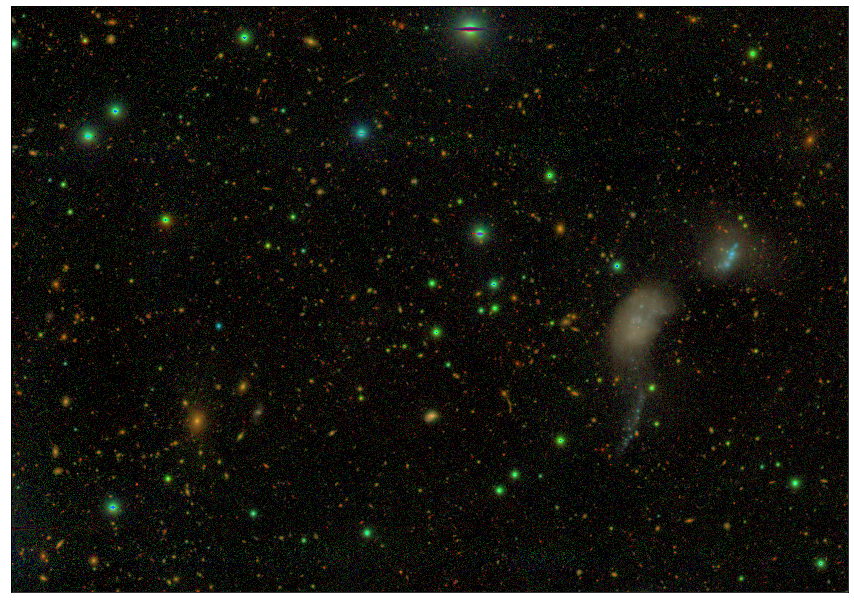

In [25]:
#iml = luptonize(data)
plt.figure(figsize=(15,12))
plt.imshow(datalup, origin='lower')
plt.xticks([])
plt.yticks([])
plt.savefig('../images/poster_background.png', bbox_inches='tight', pad_inches=-0.05)